In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
import sklearn
import scipy

import seaborn as sns
sns.set()

# Data

In [4]:
data = pd.read_csv('D:\Internship (Exposys Data)\Diabetes Prediction Dataset.csv')

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,34,1,50,1
1,1,85,66,29,0,27,0,31,0
2,8,183,64,0,0,23,1,32,1
3,1,89,66,23,94,28,0,21,0
4,0,137,40,35,168,43,2,33,1


In [6]:
data.shape

(768, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Pregnancies               768 non-null    int64
 1   Glucose                   768 non-null    int64
 2   BloodPressure             768 non-null    int64
 3   SkinThickness             768 non-null    int64
 4   Insulin                   768 non-null    int64
 5   BMI                       768 non-null    int64
 6   DiabetesPedigreeFunction  768 non-null    int64
 7   Age                       768 non-null    int64
 8   Outcome                   768 non-null    int64
dtypes: int64(9)
memory usage: 54.1 KB


# EDA

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.0,1.0,3.0,6.00,17.0
Glucose,768.0,120.894531,31.972618,0.0,99.0,117.0,140.25,199.0
BloodPressure,768.0,69.105469,19.355807,0.0,62.0,72.0,80.00,122.0
SkinThickness,768.0,20.536458,15.952218,0.0,0.0,23.0,32.00,99.0
Insulin,768.0,79.799479,115.244002,0.0,0.0,30.5,127.25,846.0
BMI,768.0,32.046875,7.888095,0.0,27.0,32.0,37.00,67.0
DiabetesPedigreeFunction,768.0,0.373698,0.510322,0.0,0.0,0.0,1.00,2.0
Age,768.0,33.240885,11.760232,21.0,24.0,29.0,41.00,81.0
Outcome,768.0,0.348958,0.476951,0.0,0.0,0.0,1.00,1.0


# Histogram Plot

C:\Users\arpit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


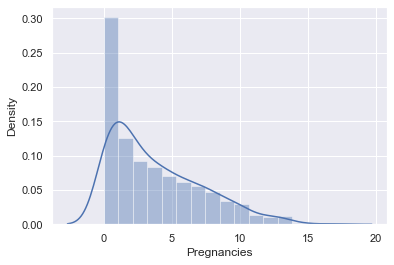

C:\Users\arpit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


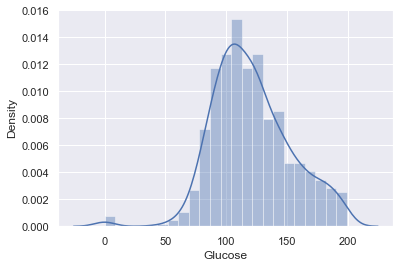

C:\Users\arpit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


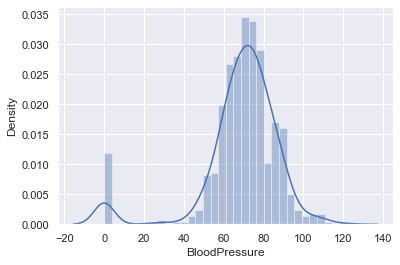

C:\Users\arpit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


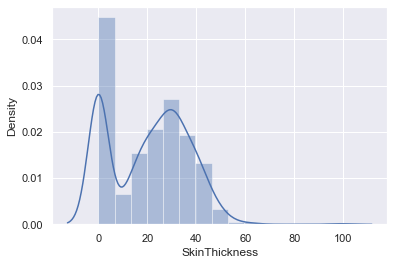

C:\Users\arpit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


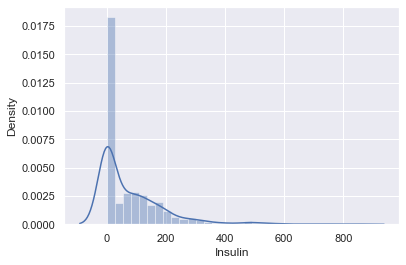

C:\Users\arpit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


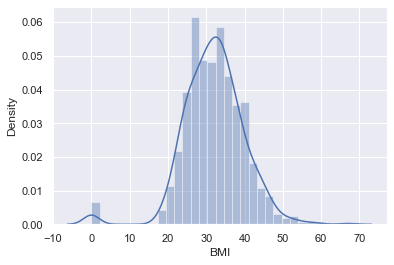

C:\Users\arpit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


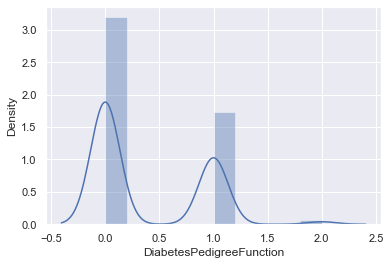

C:\Users\arpit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


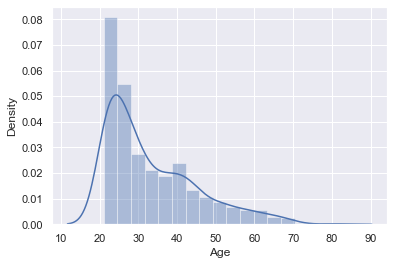

C:\Users\arpit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


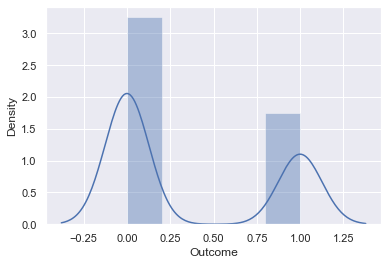

In [9]:
data_feature = data.columns

for feature in data_feature:
    p = sns.distplot(a = data[feature])
    plt.show()

In [10]:
data_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [11]:
data[data_zeros] = np.where((data[data_zeros] == 0), np.nan, data[data_zeros])

In [12]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

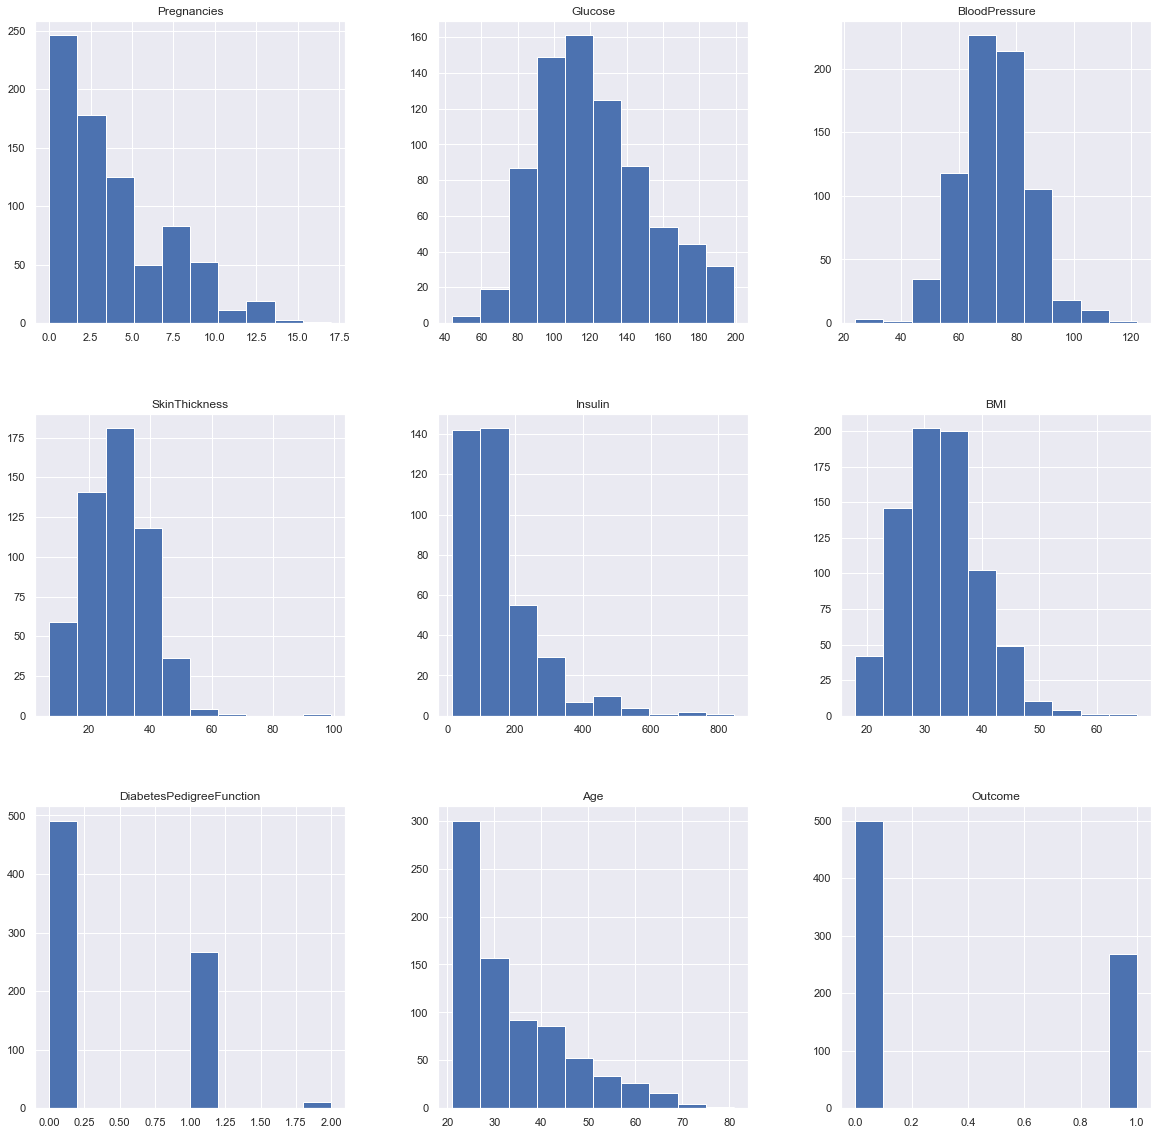

In [14]:
# for feature in data_feature:
#     plt.hist(data[feature])
#     plt.show()
p = data.hist(figsize = (20,20))

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.0,1.00,3.0,6.0,17.0
Glucose,763.0,121.686763,30.535641,44.0,99.00,117.0,141.0,199.0
BloodPressure,733.0,72.405184,12.382158,24.0,64.00,72.0,80.0,122.0
SkinThickness,541.0,29.153420,10.476982,7.0,22.00,29.0,36.0,99.0
Insulin,394.0,155.548223,118.775855,14.0,76.25,125.0,190.0,846.0
BMI,757.0,32.512550,6.925829,18.0,28.00,32.0,37.0,67.0
DiabetesPedigreeFunction,768.0,0.373698,0.510322,0.0,0.00,0.0,1.0,2.0
Age,768.0,33.240885,11.760232,21.0,24.00,29.0,41.0,81.0
Outcome,768.0,0.348958,0.476951,0.0,0.00,0.0,1.0,1.0


In [16]:
data['Glucose'] = data['Glucose'].fillna(data['Glucose'].mean())
# data.isnull().sum()

In [17]:
data['BloodPressure'] = data['BloodPressure'].fillna(data['BloodPressure'].mean())
# data.isnull().sum()

<AxesSubplot:ylabel='SkinThickness'>

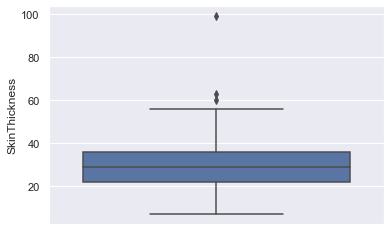

In [18]:
sns.boxplot(y = 'SkinThickness', data = data)

In [19]:
data['SkinThickness'].mean(), data['SkinThickness'].median()

(29.153419593345657, 29.0)

In [20]:
data['SkinThickness'] = data['SkinThickness'].fillna(data['SkinThickness'].median())
# data.isnull().sum()

In [21]:
data['Insulin'].mean(), data['Insulin'].median()

(155.5482233502538, 125.0)

In [22]:
data['Insulin'] = data['Insulin'].fillna(data['Insulin'].median())
# data.isnull().sum()

In [23]:
data['BMI'].mean(), data['BMI'].median()

(32.51254953764861, 32.0)

In [24]:
data['BMI'] = data['BMI'].fillna(data['BMI'].median())
# data.isnull().sum()

In [25]:
for i in range(9):
    print(data.columns[i])

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


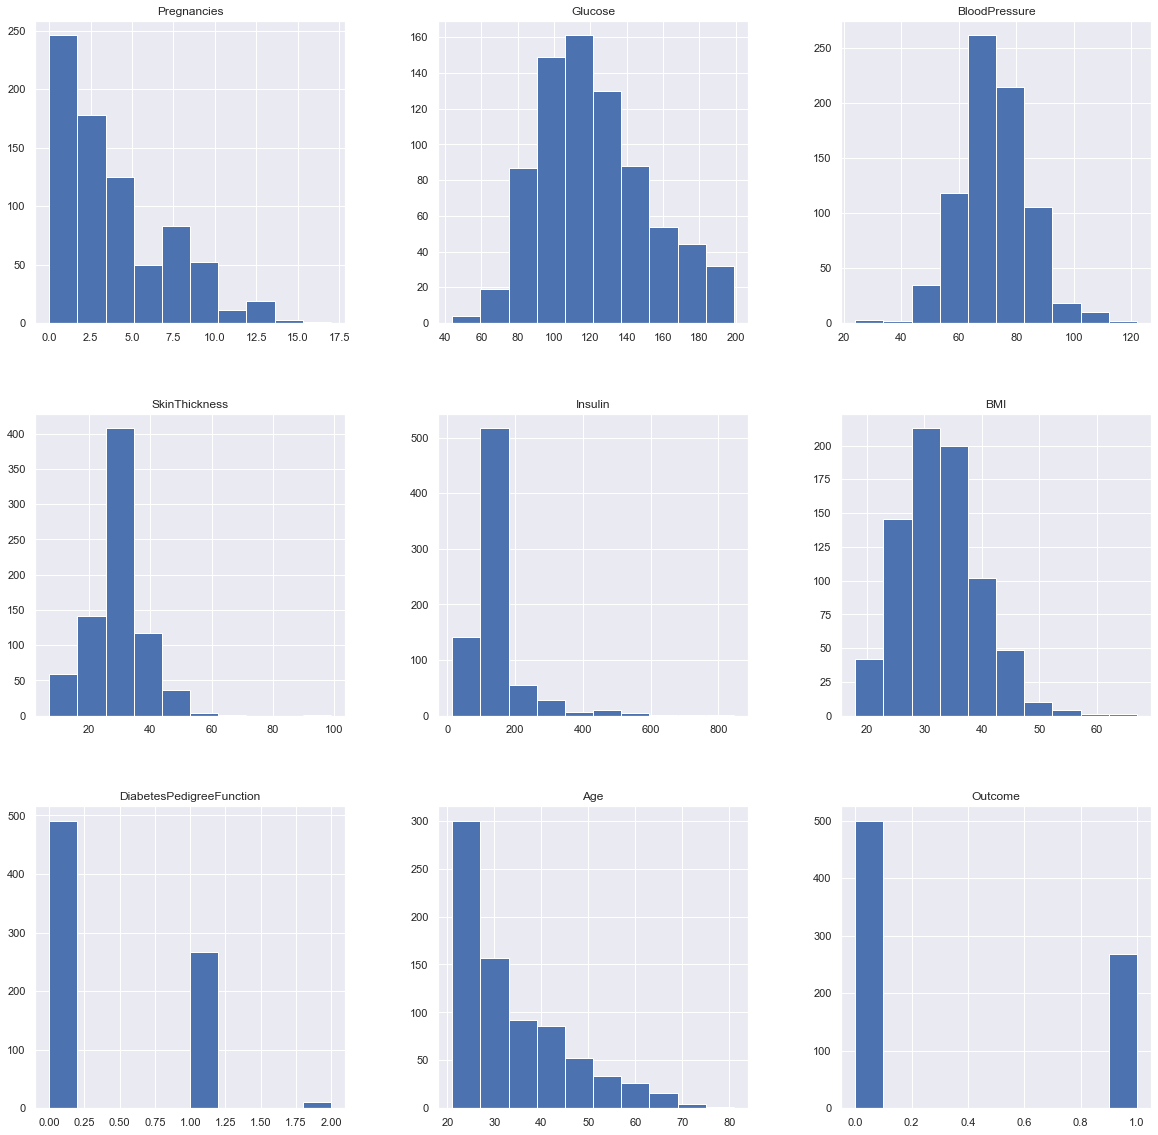

In [26]:
# for feature in data.columns:
#     plt.hist(data[feature])
#     plt.title(feature)
#     plt.show()
p = data.hist(figsize = (20,20))

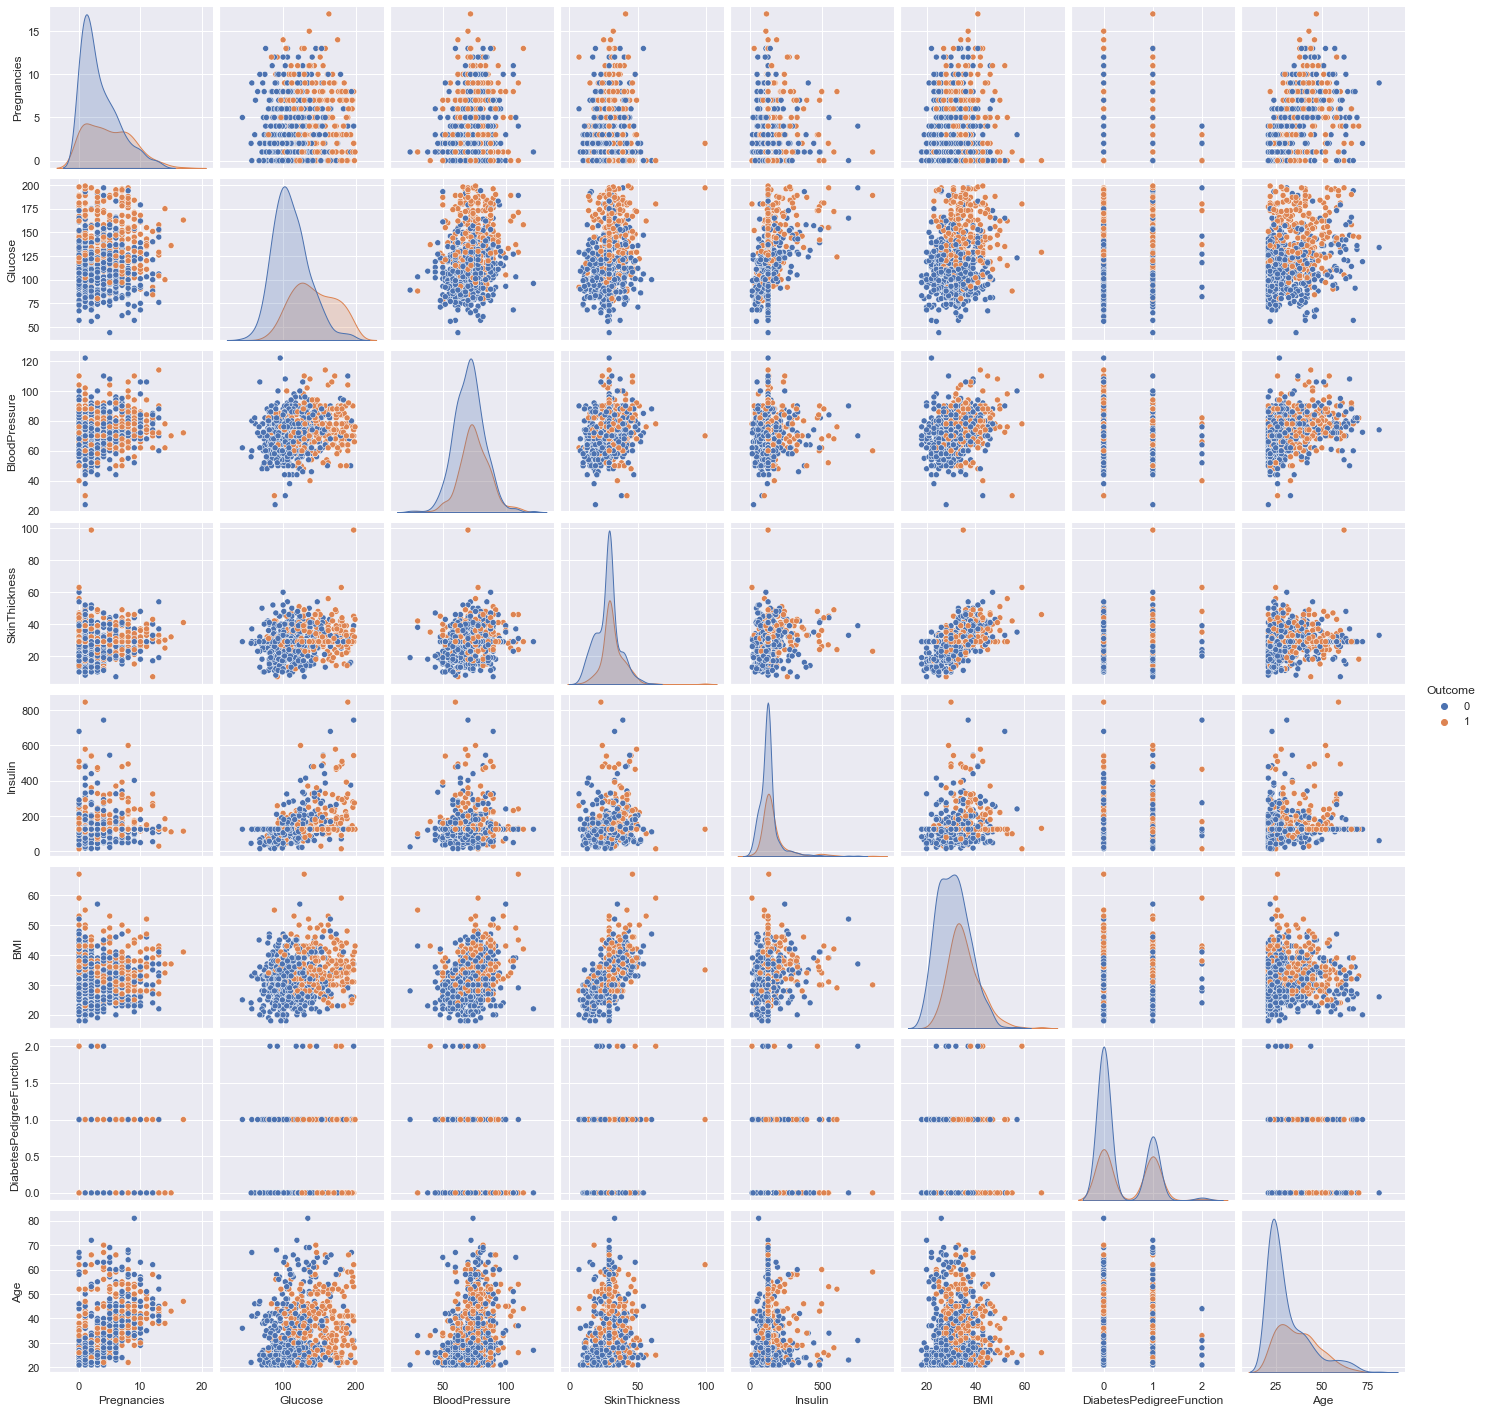

In [27]:
sns.pairplot(data =data, hue = 'Outcome')
plt.show()

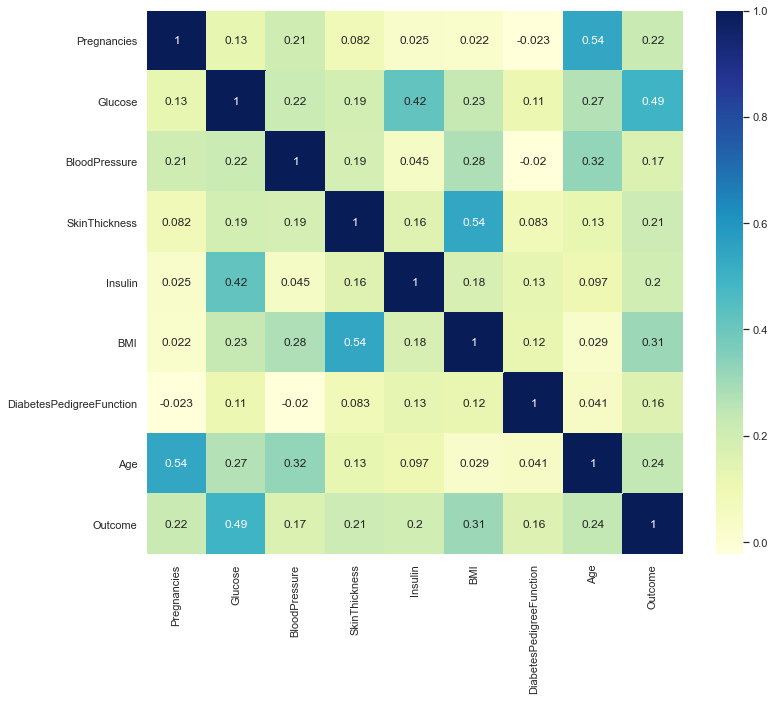

In [28]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot = True, cmap = "YlGnBu")
plt.show()

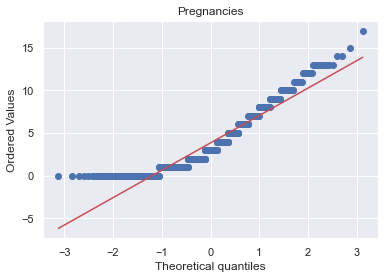

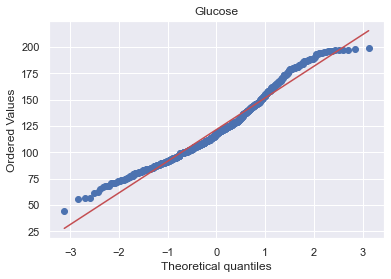

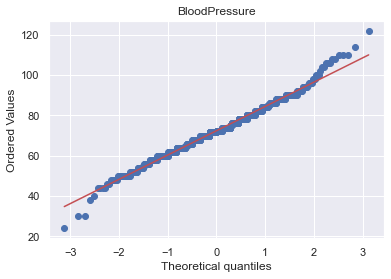

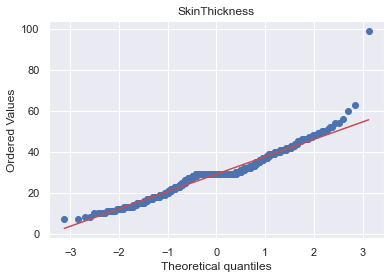

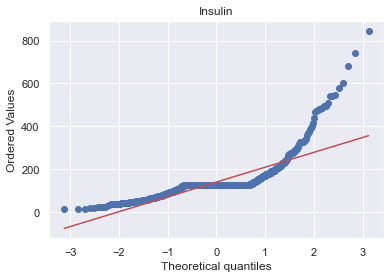

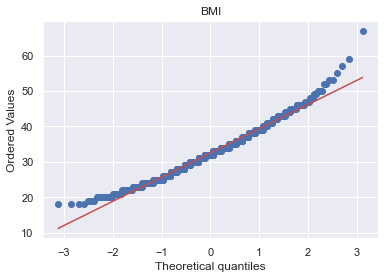

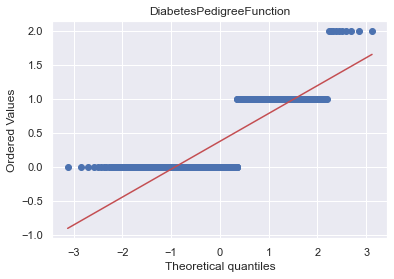

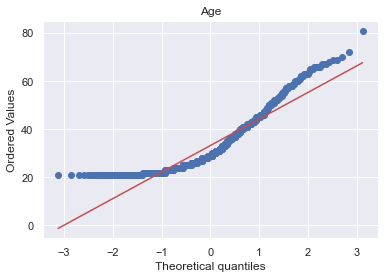

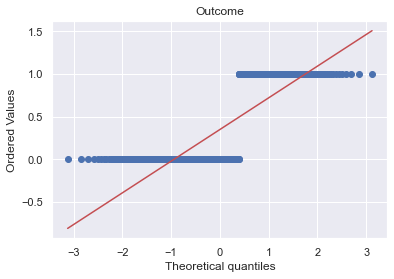

In [29]:
from scipy import stats
for feature in data.columns:
    stats.probplot(data[feature], plot = plt)
    plt.title(feature)
    plt.show()

# Standardizing Data

In [30]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [31]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,34.0,1,50,1
1,1,85.0,66.0,29.0,125.0,27.0,0,31,0
2,8,183.0,64.0,29.0,125.0,23.0,1,32,1
3,1,89.0,66.0,23.0,94.0,28.0,0,21,0
4,0,137.0,40.0,35.0,168.0,43.0,2,33,1


In [32]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [33]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,34.0,1,50
1,1,85.0,66.0,29.0,125.0,27.0,0,31
2,8,183.0,64.0,29.0,125.0,23.0,1,32
3,1,89.0,66.0,23.0,94.0,28.0,0,21
4,0,137.0,40.0,35.0,168.0,43.0,2,33


In [34]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [35]:
# X[:] = scale.fit_transform(X[:])

In [36]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,34.0,1,50
1,1,85.0,66.0,29.0,125.0,27.0,0,31
2,8,183.0,64.0,29.0,125.0,23.0,1,32
3,1,89.0,66.0,23.0,94.0,28.0,0,21
4,0,137.0,40.0,35.0,168.0,43.0,2,33


# Splitting data into train and test set

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting data in various models

In [38]:
def svm_classifier(X_train, X_test, y_train, y_test):
    
    classifier_svm = SVC(kernel = 'rbf', random_state = 0)
    classifier_svm.fit(X_train, y_train)

    y_pred = classifier_svm.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_svm.score(X_train, y_train)}\nTest score : {classifier_svm.score(X_test, y_test)}")
#     print("-"*100)
#     print(cm)

In [39]:
def knn_classifier(X_train, X_test, y_train, y_test):
    
    classifier_knn = KNeighborsClassifier(metric = 'minkowski', p = 2)
    classifier_knn.fit(X_train, y_train)

    y_pred = classifier_knn.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_knn.score(X_train, y_train)}\nTest score : {classifier_knn.score(X_test, y_test)}")
#     print("-"*100)
#     print(cm)


In [40]:
def naive_classifier(X_train, X_test, y_train, y_test):
    
    classifier_naive = GaussianNB()
    classifier_naive.fit(X_train, y_train)

    y_pred = classifier_naive.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_naive.score(X_train, y_train)}\nTest score : {classifier_naive.score(X_test, y_test)}")
#     print("-"*100)
#     print(cm)

In [41]:
def tree_classifier(X_train, X_test, y_train, y_test):
    
    classifier_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier_tree.fit(X_train, y_train)

    y_pred = classifier_tree.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_tree.score(X_train, y_train)}\nTest score : {classifier_tree.score(X_test, y_test)}")
#     print("-"*100)
#     print(cm)

In [42]:
def forest_classifier(X_train, X_test, y_train, y_test):
    classifier_forest = RandomForestClassifier(criterion = 'entropy', random_state = 0)
    classifier_forest.fit(X_train, y_train)

    y_pred = classifier_forest.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_forest.score(X_train, y_train)}\nTest score : {classifier_forest.score(X_test, y_test)}")
#     print("-"*100)
#     print(cm)

In [43]:
def print_score(X_train, X_test, y_train, y_test):
    print("SVM:\n")
    svm_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("KNN:\n")
    knn_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Naive:\n")
    naive_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Decision Tree:\n")
    tree_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Random Forest:\n")
    forest_classifier(X_train, X_test, y_train, y_test)

In [44]:
print_score(X_train, X_test, y_train, y_test)

SVM:

Train score : 0.758957654723127
Test score : 0.7922077922077922
----------------------------------------------------------------------------------------------------

KNN:

Train score : 0.8029315960912052
Test score : 0.7532467532467533
----------------------------------------------------------------------------------------------------

Naive:

Train score : 0.749185667752443
Test score : 0.7987012987012987
----------------------------------------------------------------------------------------------------

Decision Tree:

Train score : 1.0
Test score : 0.6818181818181818
----------------------------------------------------------------------------------------------------

Random Forest:

Train score : 1.0
Test score : 0.7922077922077922


# Performance Metrics

In [45]:
classifier_forest = RandomForestClassifier(criterion = 'entropy')
classifier_forest.fit(X_train, y_train)
y_pred = classifier_forest.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[93, 14],
       [18, 29]], dtype=int64)

In [46]:
# classifier_svm = SVC(kernel = 'rbf', random_state = 0, probability=True)
# classifier_svm.fit(X_train, y_train)
# y_pred = classifier_svm.predict(X_test)

# cm = confusion_matrix(y_test, y_pred)
# cm

In [47]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,93,14,107
1,18,29,47
All,111,43,154


Checking data is balanced or not

In [48]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Classification Report (Accuracy, Precision, Recall, F1-score)

In [49]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154



Getting probability instead of A/B test

In [51]:
y_pred_prob = classifier_forest.predict_proba(X_test)[:,1]
y_pred_prob

array([0.85, 0.21, 0.03, 0.6 , 0.14, 0.  , 0.88, 0.85, 0.31, 0.29, 0.68,
       0.86, 0.1 , 0.11, 0.54, 0.57, 0.79, 0.03, 0.31, 0.23, 0.7 , 0.13,
       0.12, 0.17, 0.  , 0.44, 0.04, 0.89, 0.  , 0.05, 0.31, 0.14, 0.13,
       0.55, 0.13, 0.84, 0.4 , 0.05, 0.31, 0.74, 0.24, 0.1 , 0.16, 0.85,
       0.74, 0.08, 0.09, 0.09, 0.42, 0.31, 0.47, 0.14, 0.8 , 0.53, 0.18,
       0.01, 0.23, 0.32, 0.38, 0.43, 0.88, 0.59, 0.05, 0.78, 0.84, 0.53,
       0.78, 0.05, 0.54, 0.28, 0.13, 0.15, 0.06, 0.86, 0.93, 0.33, 0.22,
       0.49, 0.31, 0.26, 0.42, 0.35, 0.23, 0.  , 0.19, 0.13, 0.04, 0.29,
       0.89, 0.08, 0.56, 0.23, 0.15, 0.01, 0.62, 0.13, 0.33, 0.44, 0.38,
       0.49, 0.25, 0.02, 0.15, 0.01, 0.54, 0.77, 0.12, 0.63, 0.04, 0.5 ,
       0.02, 0.6 , 0.56, 0.46, 0.76, 0.7 , 0.04, 0.46, 0.11, 0.79, 0.38,
       0.31, 0.2 , 0.31, 0.06, 0.  , 0.26, 0.48, 0.43, 0.42, 0.45, 0.4 ,
       0.07, 0.78, 0.26, 0.66, 0.36, 0.52, 0.4 , 0.24, 0.05, 0.57, 0.02,
       0.1 , 0.8 , 0.01, 0.07, 0.03, 0.06, 0.26, 0.

Evaluating FPR, TPR, Threshold

In [52]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
print("FPR:\n\n", fpr)


print("-"*100)

print("TPR:\n\n", tpr)

FPR:

 [0.         0.         0.00934579 0.00934579 0.01869159 0.01869159
 0.01869159 0.01869159 0.01869159 0.02803738 0.02803738 0.02803738
 0.04672897 0.04672897 0.05607477 0.07476636 0.08411215 0.09345794
 0.12149533 0.13084112 0.13084112 0.14018692 0.14018692 0.14953271
 0.1588785  0.1682243  0.18691589 0.19626168 0.21495327 0.22429907
 0.23364486 0.25233645 0.26168224 0.26168224 0.3271028  0.34579439
 0.35514019 0.38317757 0.39252336 0.42056075 0.45794393 0.52336449
 0.57943925 0.62616822 0.6635514  0.69158879 0.70093458 0.73831776
 0.76635514 0.82242991 0.85046729 0.87850467 0.95327103 1.        ]
----------------------------------------------------------------------------------------------------
TPR:

 [0.         0.0212766  0.04255319 0.08510638 0.10638298 0.17021277
 0.29787234 0.36170213 0.40425532 0.42553191 0.46808511 0.5106383
 0.5106383  0.55319149 0.55319149 0.55319149 0.57446809 0.57446809
 0.57446809 0.59574468 0.63829787 0.65957447 0.68085106 0.68085106
 0.70212766 0.

*Plotting ROC Curve*

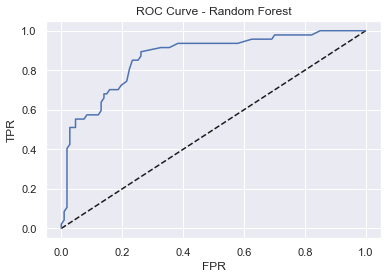

In [53]:
plt.plot([0, 1], [0, 1], "k--", label = '50% AUC')
plt.plot(fpr, tpr, label = "Random Forest")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - Random Forest")
plt.show()

ROC Score

In [54]:
roc_auc_score(y_test,y_pred_prob)

0.8668721415788426

# Hyperparameter Tunning

In [55]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_forest, X = X_train, y = y_train, cv = 10)
print(accuracies.mean(), accuracies.std())

0.7476467477525118 0.05392146184887737


In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
parameters = {
    'n_estimators': [25, 50, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [14, 20, 25, 30]
}

In [58]:
grid_search = GridSearchCV(estimator = classifier_forest,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
print('best_accuracy = ',grid_search.best_score_)
print('best_parameters = ', grid_search.best_params_)

best_accuracy =  0.7589370703331572
best_parameters =  {'criterion': 'gini', 'max_depth': 25, 'n_estimators': 50}


In [59]:
classifier_forest = RandomForestClassifier(criterion = 'gini', max_depth = 25, n_estimators = 200, random_state = 0)
classifier_forest.fit(X_train, y_train)
y_pred = classifier_forest.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[95, 12],
       [18, 29]], dtype=int64)

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       107
           1       0.71      0.62      0.66        47

    accuracy                           0.81       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.80      0.81      0.80       154



# Saving model using pickle

In [61]:
filename = 'diabetes_model.pkl'
pickle.dump(classifier_forest, open(filename, 'wb'))

In [62]:
model = open('diabetes_model.pkl','rb')
forest = pickle.load(model)

In [63]:
y_pred = forest.predict(X_test)

In [64]:
confusion_matrix(y_test, y_pred)

array([[95, 12],
       [18, 29]], dtype=int64)